In [11]:
import os
import shutil
from concurrent.futures import ThreadPoolExecutor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Spliting the data folder into : Train and Test 

In [3]:
def split_data(data_dir, train_size=0.7):

    # Get the list of all pass image file names
    pass_dir = os.path.join(data_dir, "pass")
    pass_images = [os.path.join(pass_dir, file) for file in os.listdir(pass_dir)]

    # Get the list of all fail image file names
    fail_dir = os.path.join(data_dir, "fail")
    fail_images = [os.path.join(fail_dir, file) for file in os.listdir(fail_dir)]

    # Split the data into train and test sets
    pass_train, pass_test = train_test_split(pass_images, train_size=train_size, random_state=42)
    fail_train, fail_test = train_test_split(fail_images, train_size=train_size, random_state=42)

    # Create the train and test directories
    train_dir = os.path.join(data_dir, "train")
    test_dir = os.path.join(data_dir, "test")
    os.makedirs(os.path.join(train_dir, "pass"), exist_ok=True)
    os.makedirs(os.path.join(train_dir, "fail"), exist_ok=True)
    os.makedirs(os.path.join(test_dir, "pass"), exist_ok=True)
    os.makedirs(os.path.join(test_dir, "fail"), exist_ok=True)

    # Define a function to copy images to a directory
    def copy_images(images, dest_dir):
        for file in images:
            dest_file = os.path.join(dest_dir, os.path.basename(file))
            if not os.path.exists(dest_file):
                shutil.copy(file, dest_file)

    # Copy the pass images to the train and test directories using multiple threads
    with ThreadPoolExecutor() as executor:
        executor.submit(copy_images, pass_train, os.path.join(train_dir, "pass"))
        executor.submit(copy_images, pass_test, os.path.join(test_dir, "pass"))

    # Copy the fail images to the train and test directories using multiple threads
    with ThreadPoolExecutor() as executor:
        executor.submit(copy_images, fail_train, os.path.join(train_dir, "fail"))
        executor.submit(copy_images, fail_test, os.path.join(test_dir, "fail"))


In [3]:
split_data("D:/fuse_box_dataset_organized/D-E")

In [4]:
split_data("D:/fuse_box_dataset_organized/J")

In [5]:
split_data("D:/fuse_box_dataset_organized/G-H")

In [16]:
def count_files(data_dir):
    train_dir = os.path.join(data_dir, "train")
    test_dir = os.path.join(data_dir, "test")

    pass_train_dir = os.path.join(train_dir, "pass")
    fail_train_dir = os.path.join(train_dir, "fail")
    pass_test_dir = os.path.join(test_dir, "pass")
    fail_test_dir = os.path.join(test_dir, "fail")

    num_pass_train_files = len(os.listdir(pass_train_dir))
    num_fail_train_files = len(os.listdir(fail_train_dir))
    num_pass_test_files = len(os.listdir(pass_test_dir))
    num_fail_test_files = len(os.listdir(fail_test_dir))

    file_counts = {"train/pass": num_pass_train_files, "train/fail": num_fail_train_files,
                   "test/pass": num_pass_test_files, "test/fail": num_fail_test_files}

    # Visualize the file counts as a bar chart
    fig, ax = plt.subplots()
    ax.bar(file_counts.keys(), file_counts.values())
    ax.set_title("Number of Files in Each Category")
    plt.show()

    return file_counts


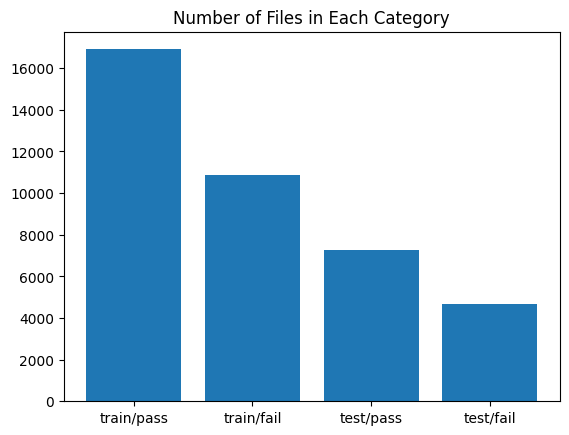

In [17]:
file_counts_DE = count_files("D:/fuse_box_dataset_organized/D-E")

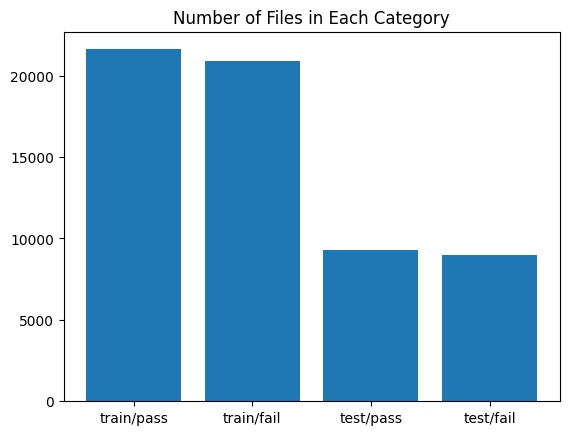

In [18]:
file_counts_GH = count_files("D:/fuse_box_dataset_organized/G-H")

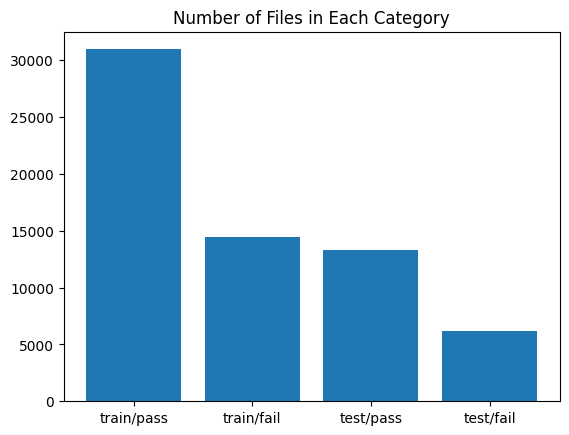

In [19]:
file_counts_J = count_files("D:/fuse_box_dataset_organized/J")